# 1. 线性回归

## 1.1 单变量线性回归
### 单变量线性回归公式
$$h_{w,b}(x)=b+wx$$
$w$和$b$是参数，为了方便运算，可以给$x$加上一个$x_0$
$$h_{w,b}(x)=bx_{0}+wx_{1}$$
### 损失函数
$$J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}(h_{w,b}(x^{(i)})-y^{(i)})^{2}$$
为了避免不恰当的数据范围带来损失过大或过小，在评估损失的时候，可以对$h_{w,b}(x^{(i)})$和$y^{(i)}$先进行标准化，使得损失数值在可评估的范围内。
**在进行梯度下降时，不进行此操作**
### 优化算法——梯度下降
$$w_j=w_{j}-\alpha\frac{\partial}{\partial{w_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})x^{(i)}}$$
$$b_j=b_{j}-\alpha\frac{\partial}{\partial{b_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})}$$

### python代码

In [61]:
import time

import matplotlib.pyplot as plt
import numpy as np
from LinearRegression import compute_loss

读取数据集

In [62]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

查看数据集

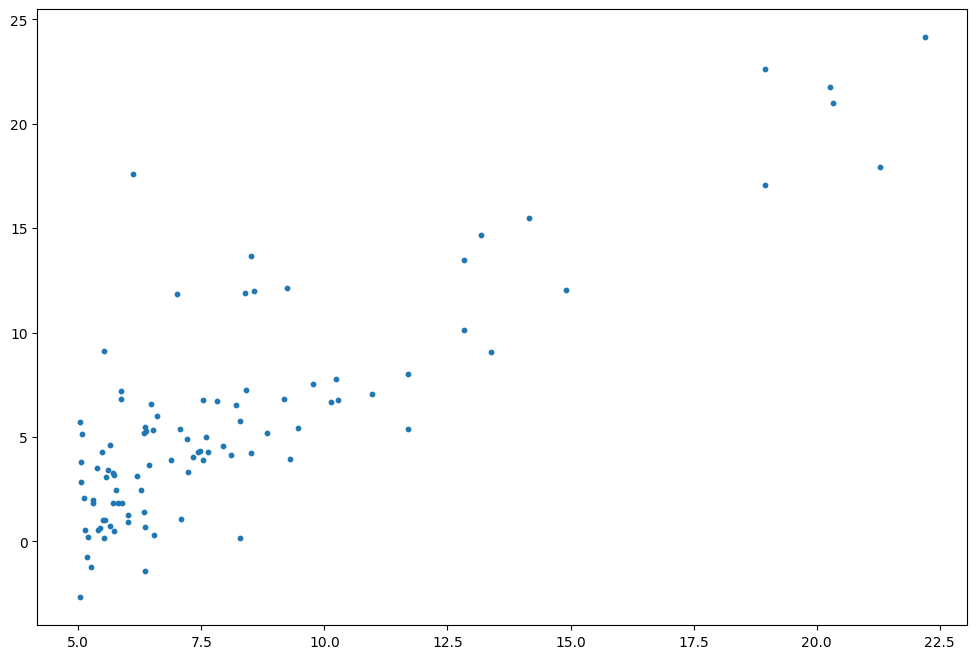

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=data[:, 0], y=data[:, 1], s=10)
plt.show()

分割训练集和验证集

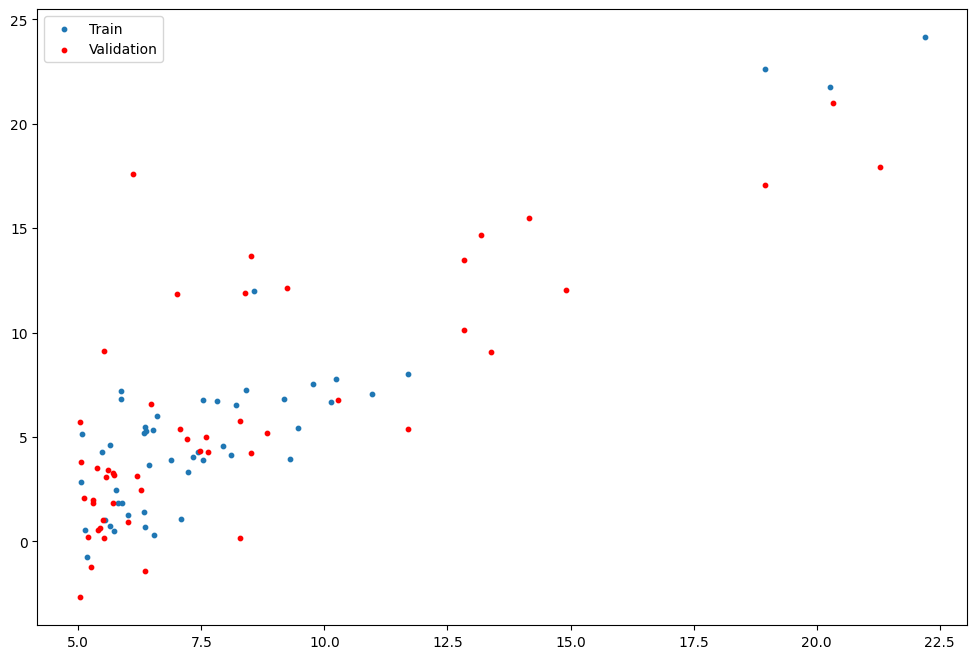

In [64]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data[:, 0], data[:, 1], test_size=0.5)
# train_x, val_x, train_y, val_y = data[:, :-1], data[:, :-1], data[:, -1], data[:, -1]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train_x, y=train_y, s=10, label="Train")
ax.scatter(x=val_x, y=val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()


扩展维度，从长度为$n$的向量变成$n\times 1$的矩阵

In [65]:
train_x_ex = np.expand_dims(train_x,axis=1)
train_y_ex = np.expand_dims(train_y,axis=1)
# train_x_ex =train_x
val_x_ex = np.expand_dims(val_x,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)
# val_x_ex =val_x
train_x_ex

array([[ 6.3654],
       [ 5.7292],
       [18.945 ],
       [ 8.2111],
       [ 5.6397],
       [10.957 ],
       [ 5.6407],
       [ 5.5416],
       [ 6.8825],
       [ 9.3102],
       [ 7.0931],
       [ 6.5894],
       [ 5.4901],
       [ 7.2259],
       [ 5.0594],
       [ 7.9334],
       [10.236 ],
       [ 5.8707],
       [ 5.8598],
       [11.7   ],
       [ 9.7687],
       [ 7.8247],
       [20.27  ],
       [ 5.8014],
       [ 5.7737],
       [ 7.5402],
       [ 6.5159],
       [ 5.1301],
       [ 9.1802],
       [ 8.0959],
       [ 6.3328],
       [ 6.0062],
       [ 6.3534],
       [ 5.8918],
       [22.203 ],
       [ 8.4084],
       [10.136 ],
       [ 5.1793],
       [ 7.3345],
       [ 8.5781],
       [ 6.5479],
       [ 7.4239],
       [ 6.3261],
       [ 9.4536],
       [ 6.3557],
       [ 7.5386],
       [ 6.4296],
       [ 5.0702]])

调入线性回归类，获得参数矩阵和训练损失序列，记录训练时间

**运行速度：**
原版本：循环计算每一个参数，进行更新
```
error = pred - y
repeat{
    theta[0,i]=theta[0,i] - ((alpha / len(X)) * np.sum(np.multiply(error, x[:,i])))
}
```
改进后：使用numpy的矩阵运算

In [66]:
from LinearRegression import LinearRegression

epochs = 200
alpha = 1
linear_reg = LinearRegression(x=train_x_ex,y=train_y_ex,val_x=val_x_ex, val_y=val_y_ex, lr=alpha,epoch=epochs)
start_time = time.time()
theta,loss, val_loss = linear_reg.train()
end_time = time.time()

theta

Epoch: 1/200	Train Loss: 0.5000	Val loss: 0.5000
Epoch: 2/200	Train Loss: 0.4828	Val loss: 0.4854
Epoch: 3/200	Train Loss: 0.4664	Val loss: 0.4714
Epoch: 4/200	Train Loss: 0.4506	Val loss: 0.4581
Epoch: 5/200	Train Loss: 0.4355	Val loss: 0.4453
Epoch: 6/200	Train Loss: 0.4210	Val loss: 0.4332
Epoch: 7/200	Train Loss: 0.4071	Val loss: 0.4215
Epoch: 8/200	Train Loss: 0.3938	Val loss: 0.4104
Epoch: 9/200	Train Loss: 0.3810	Val loss: 0.3999
Epoch: 10/200	Train Loss: 0.3688	Val loss: 0.3897
Epoch: 11/200	Train Loss: 0.3571	Val loss: 0.3801
Epoch: 12/200	Train Loss: 0.3458	Val loss: 0.3709
Epoch: 13/200	Train Loss: 0.3350	Val loss: 0.3621
Epoch: 14/200	Train Loss: 0.3247	Val loss: 0.3537
Epoch: 15/200	Train Loss: 0.3147	Val loss: 0.3457
Epoch: 16/200	Train Loss: 0.3052	Val loss: 0.3381
Epoch: 17/200	Train Loss: 0.2961	Val loss: 0.3308
Epoch: 18/200	Train Loss: 0.2874	Val loss: 0.3239
Epoch: 19/200	Train Loss: 0.2790	Val loss: 0.3173
Epoch: 20/200	Train Loss: 0.2710	Val loss: 0.3110
Epoch: 21

array([[-4.77440248,  1.28481478]])

查看训练时间,计算在验证集上的损失

In [67]:
print("Train Time: {:.4f}s".format(end_time-start_time))
from LinearRegression import square_loss
pred_val = linear_reg.predict(val_x_ex)
loss_val = square_loss(pred_val, val_y_ex)
loss_val = loss_val / (2 * pred_val.shape[0])
print("Val Loss: {:.4f}".format(loss_val))

Train Time: 0.0309s
Val Loss: 6.7951


使用sklearn库函数进行验证

In [68]:
from sklearn.linear_model import LinearRegression
sklearn_lr = LinearRegression()
sk_start_time = time.time()
sklearn_lr.fit(train_x_ex,train_y_ex)
sk_end_time = time.time()

sk_theta = [sklearn_lr.intercept_[0],sklearn_lr.coef_[0, 0]]
sk_lr_pred = sklearn_lr.predict(val_x_ex)

from LinearRegression import square_loss
sk_loss_val = square_loss(sk_lr_pred, val_y_ex)
sk_loss_val = sk_loss_val / (2 * sk_lr_pred.shape[0])
print("Sklearn Val Loss: {:.4f}".format(sk_loss_val))
print("Sklearn Parameters: ", sklearn_lr.intercept_, sklearn_lr.coef_)
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))

Sklearn Val Loss: 6.8542
Sklearn Parameters:  [-4.92909292] [[1.30416367]]
Sklearn Train Time: 0.0000s


画出预测的直线

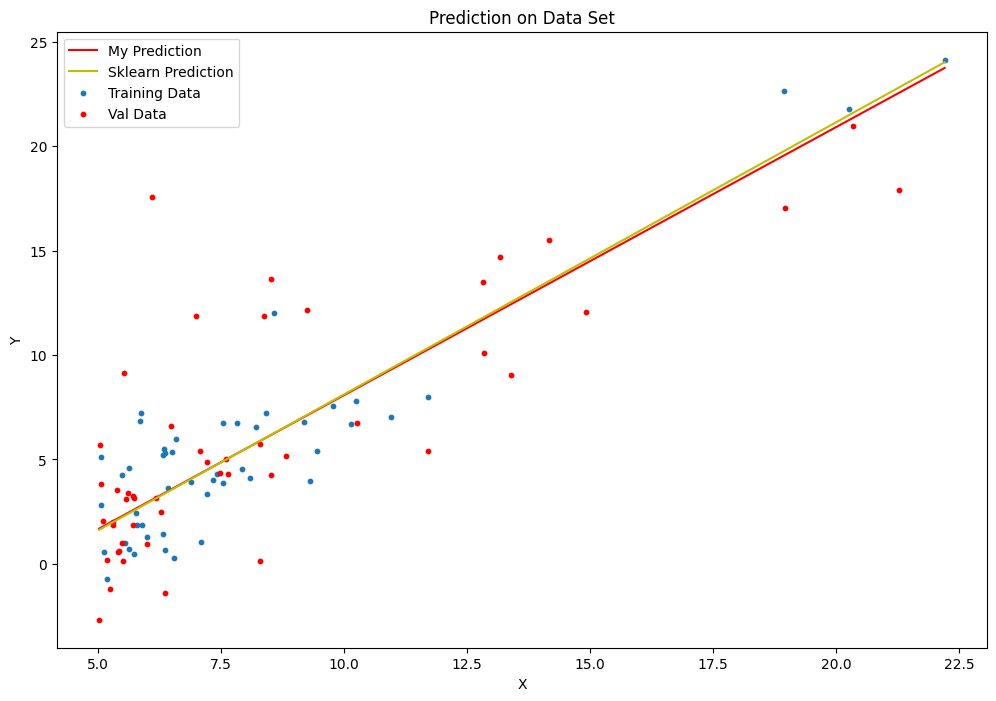

In [69]:
x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
f = theta[0, 0] + (theta[0, 1] * x)
f1 = sk_theta[0] + (sk_theta[1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='My Prediction')
ax.plot(x, f1, 'y', label='Sklearn Prediction')
ax.scatter(train_x, train_y, label='Training Data', s=10)
ax.scatter(val_x, val_y, label='Val Data', color="red", s=10)
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction on Data Set')
plt.show()

画出训练损失曲线

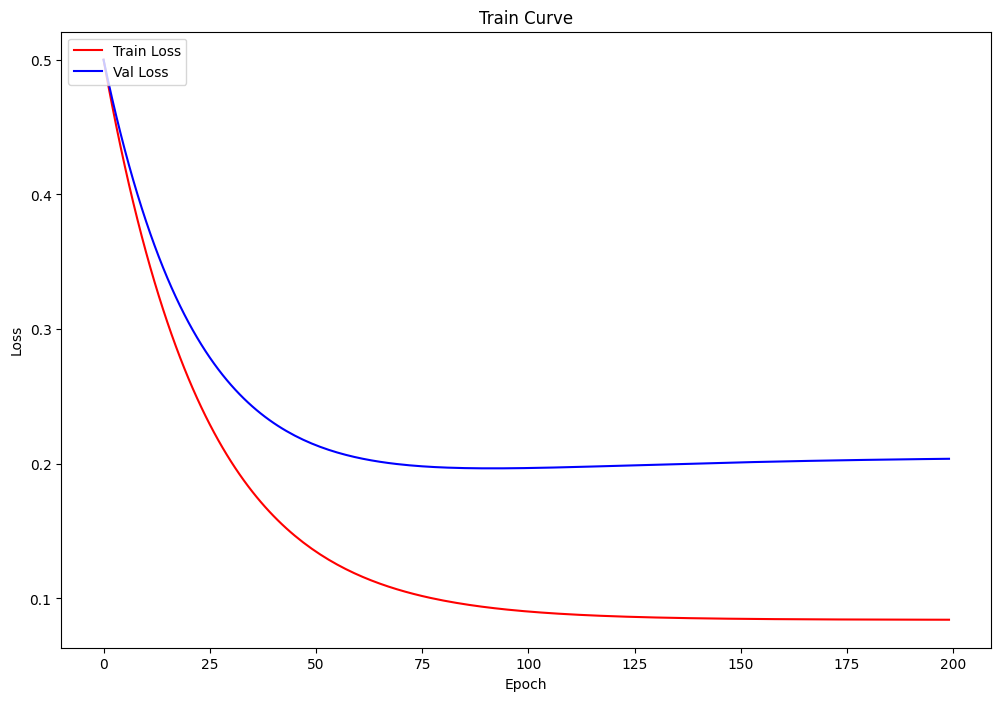

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epochs), loss, 'r', label="Train Loss")
ax.plot(np.arange(epochs), val_loss, 'b', label="Val Loss")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train Curve')
plt.legend(loc=2)
plt.show()

## 多变量线性回归
### 数据标准化
对数据进行标准化，能使得参数在合理的范围内，能更好地收敛，若不进行标准化，则会出现下图所示的情况
![](../imgs/standered.png)

加载数据集

In [71]:
data2 = np.loadtxt('ex1data2.txt', delimiter=',')
data2

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

数据可视化

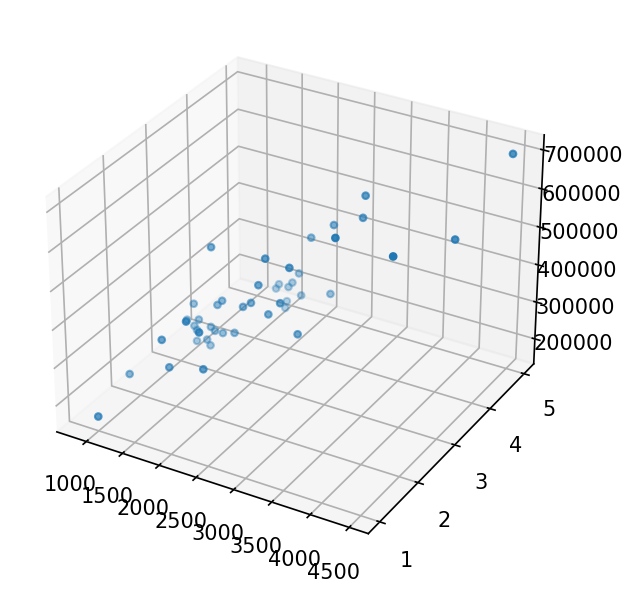

In [72]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(data2[:,0],data2[:,1],data2[:,2],s=10)
plt.show()

划分训练集、验证集

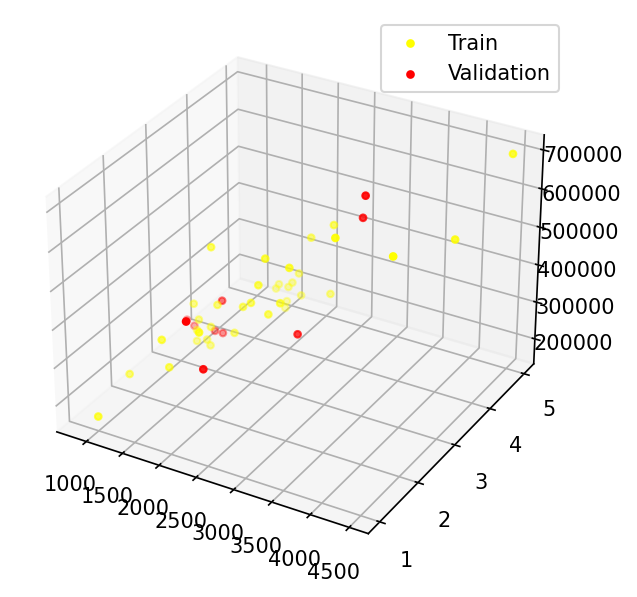

In [73]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data2[:, :2], data2[:, 2], test_size=0.2)
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()

扩展y的维度 (n)->(n,1)

In [74]:
train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)

调用模型，训练，记录训练时间

In [81]:
from LinearRegression import LinearRegression

alpha = 0.1
epochs = 1000
multi_lr = LinearRegression(train_x,train_y_ex,val_x=val_x,val_y=val_y_ex, epoch=epochs,lr=alpha)
start_time = time.time()
theta, loss, val_loss = multi_lr.train()
end_time = time.time()
theta

Epoch: 1/1000	Train Loss: 0.5000	Val loss: 0.5000
Epoch: 2/1000	Train Loss: 0.4976	Val loss: 0.4974
Epoch: 3/1000	Train Loss: 0.4951	Val loss: 0.4948
Epoch: 4/1000	Train Loss: 0.4927	Val loss: 0.4922
Epoch: 5/1000	Train Loss: 0.4903	Val loss: 0.4896
Epoch: 6/1000	Train Loss: 0.4880	Val loss: 0.4870
Epoch: 7/1000	Train Loss: 0.4856	Val loss: 0.4845
Epoch: 8/1000	Train Loss: 0.4833	Val loss: 0.4820
Epoch: 9/1000	Train Loss: 0.4810	Val loss: 0.4795
Epoch: 10/1000	Train Loss: 0.4787	Val loss: 0.4770
Epoch: 11/1000	Train Loss: 0.4764	Val loss: 0.4745
Epoch: 12/1000	Train Loss: 0.4741	Val loss: 0.4721
Epoch: 13/1000	Train Loss: 0.4719	Val loss: 0.4697
Epoch: 14/1000	Train Loss: 0.4696	Val loss: 0.4673
Epoch: 15/1000	Train Loss: 0.4674	Val loss: 0.4649
Epoch: 16/1000	Train Loss: 0.4652	Val loss: 0.4625
Epoch: 17/1000	Train Loss: 0.4631	Val loss: 0.4602
Epoch: 18/1000	Train Loss: 0.4609	Val loss: 0.4579
Epoch: 19/1000	Train Loss: 0.4587	Val loss: 0.4556
Epoch: 20/1000	Train Loss: 0.4566	Val lo

array([[88367.45152386,   116.66335824,  5336.94790299]])

查看训练时间

In [82]:
print("Train Time: {:.4f}s".format(end_time-start_time))

Train Time: 0.1209s


查看验证集损失

In [83]:
from LinearRegression import compute_loss
pred = multi_lr.predict(val_x)
multi_loss = compute_loss(pred,val_y_ex)
print("Val Loss: {:.4f}".format(multi_loss))

Val Loss: 4.1847


查看库函数的训练时间、损失和参数

In [84]:
from sklearn.linear_model import LinearRegression
sk_multi_lr = LinearRegression()
sk_start_time = time.time()
sk_multi_lr.fit(train_x,train_y_ex)
sk_end_time = time.time()

sk_lr_pred = sk_multi_lr.predict(val_x)
sk_loss = compute_loss(sk_lr_pred,val_y_ex)
sk_theta = np.array([[sk_multi_lr.intercept_[0],sk_multi_lr.coef_[0,0],sk_multi_lr.coef_[0,1]]])
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))
print("Sklearn Val Loss: {:.4f}".format(sk_loss))
print("Sklearn parameters: ", sk_multi_lr.intercept_, sk_multi_lr.coef_)

Sklearn Train Time: 0.0010s
Sklearn Val Loss: 4.1847
Sklearn parameters:  [115549.61458428] [[   141.4492488  -18696.64278462]]


结果可视化

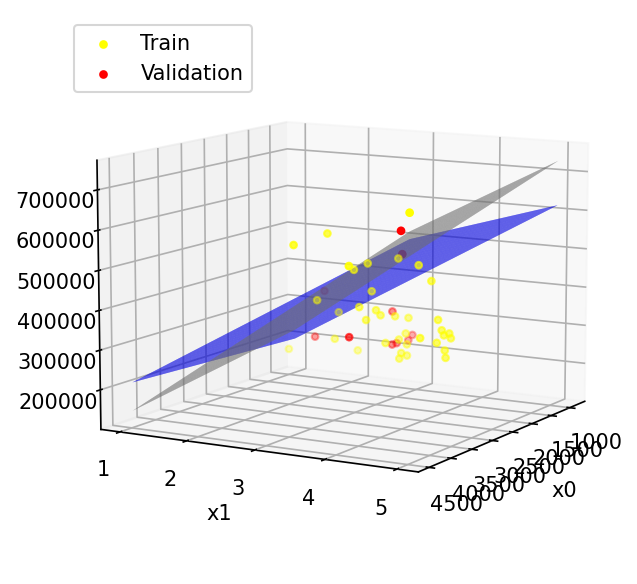

In [85]:
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
x = np.linspace(data2[:,0].min(), data2[:,0].max(), num=100)
y = np.linspace(data2[:,1].min(), data2[:,1].max(), num=100)

xx, yy = np.meshgrid(x, y)

z1 = np.zeros((100, 100))
z2 = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        z1[i,j] = theta[0,0] + theta[0,1] * x[i] + theta[0,2] * y[j]
        z2[i,j] = sk_theta[0,0] + sk_theta[0,1] * x[i] + sk_theta[0,2] * y[j]

ax.plot_surface(xx,yy,z1,alpha=0.8, rstride=3, cstride=1, color="blue")
ax.plot_surface(xx,yy,z2,alpha=0.8, rstride=3, cstride=1, color="gray")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.view_init(elev=10, azim=30)
plt.legend(loc=2)
plt.show()

训练过程可视化

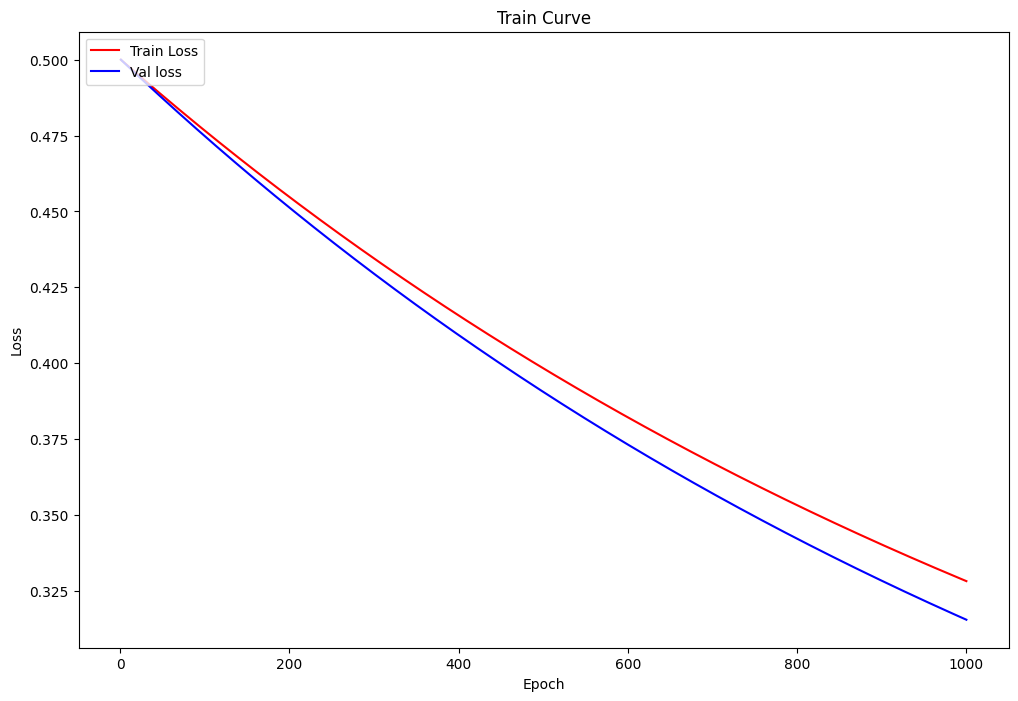

In [80]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,epochs+1), loss, 'r', label="Train Loss")
ax.plot(np.arange(1,epochs+1), val_loss, 'b', label="Val loss")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train Curve')
plt.legend(loc=2)
plt.show()